# Load dataset

In [1]:
import requests
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Load the dataset
dataset = requests.get(url).text

# load it into a pandas dataframe
dataset = pd.read_csv(url, header=None)

# Set the columns names
dataset.columns = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "class"]

# Show the dataset
print(dataset)

     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  class
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]


# Create Decision Tree

In [2]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import the train_test_split function
from sklearn.model_selection import train_test_split
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Split the dataset into features and target
features = dataset.iloc[:, 0:8]
target = dataset.iloc[:, 8]

# Split the dataset into training, validation and testing data
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=1)

# Create the classifier with all parameters set explicitly
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)

# Train the classifier
classifier.fit(features_train, target_train)

# Predict the target values for the test data
target_predicted = classifier.predict(features_test)

# Show the accuracy score
print(f"Training accuracy: {classifier.score(features_train, target_train)}")
print(f"Testing accuracy: {classifier.score(features_test, target_test)}")

print("\n")

# Show the feature importance with the Feature Names from the dataset
temp_df = pd.DataFrame({"feature": list(features.columns), "importance": classifier.feature_importances_})
temp_df.sort_values(by=["importance"], ascending=False, inplace=True)
print(temp_df)

Training accuracy: 0.7719869706840391
Testing accuracy: 0.7987012987012987


    feature  importance
1   glucose    0.625810
5       bmi    0.266582
7       age    0.107608
0  pregnant    0.000000
2        bp    0.000000
3      skin    0.000000
4   insulin    0.000000
6  pedigree    0.000000


# Show Decision Tree rules

In [3]:
from sklearn.tree import export_text

print(export_text(classifier, feature_names=list(features.columns)))

|--- glucose <= 127.50
|   |--- bmi <= 26.45
|   |   |--- bmi <= 9.10
|   |   |   |--- class: 0
|   |   |--- bmi >  9.10
|   |   |   |--- class: 0
|   |--- bmi >  26.45
|   |   |--- age <= 28.50
|   |   |   |--- class: 0
|   |   |--- age >  28.50
|   |   |   |--- class: 0
|--- glucose >  127.50
|   |--- glucose <= 166.50
|   |   |--- bmi <= 29.95
|   |   |   |--- class: 0
|   |   |--- bmi >  29.95
|   |   |   |--- class: 1
|   |--- glucose >  166.50
|   |   |--- glucose <= 172.50
|   |   |   |--- class: 1
|   |   |--- glucose >  172.50
|   |   |   |--- class: 1



# Create a Random Forest and train it on the Dataset

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Create the classifier with all parameters set explicitly
classifier = RandomForestClassifier(criterion="entropy", max_depth=3, random_state=1, bootstrap=True, n_estimators=4)

# Train the classifier
classifier.fit(features_train, target_train)

# Predict the target values for the test data
target_predicted = classifier.predict(features_test)

# Show the accuracy score
print(f"Training accuracy: {classifier.score(features_train, target_train)}")
print(f"Testing accuracy: {classifier.score(features_test, target_test)}")

print("\n")

# Show the feature importance with the Feature Names from the dataset
temp_df = pd.DataFrame({"feature": list(features.columns), "importance": classifier.feature_importances_})
temp_df.sort_values(by=["importance"], ascending=False, inplace=True)
print(temp_df)

Training accuracy: 0.7801302931596091
Testing accuracy: 0.7662337662337663


    feature  importance
1   glucose    0.444176
5       bmi    0.262785
7       age    0.111630
6  pedigree    0.069282
0  pregnant    0.065009
3      skin    0.027660
4   insulin    0.019457
2        bp    0.000000


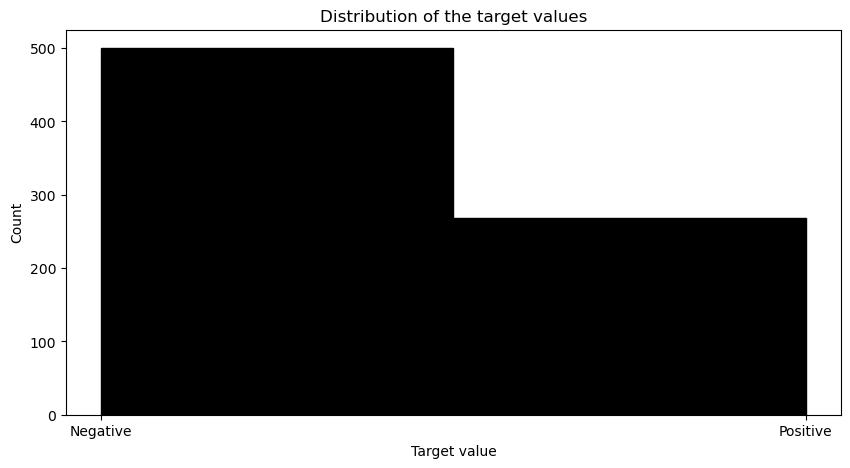

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(dataset["class"], bins=2, color="black", edgecolor="black")
# Show the class names
plt.xticks([0, 1], ["Negative", "Positive"])
plt.title("Distribution of the target values")
plt.xlabel("Target value")
plt.ylabel("Count")
plt.show()

# Balance the datasets

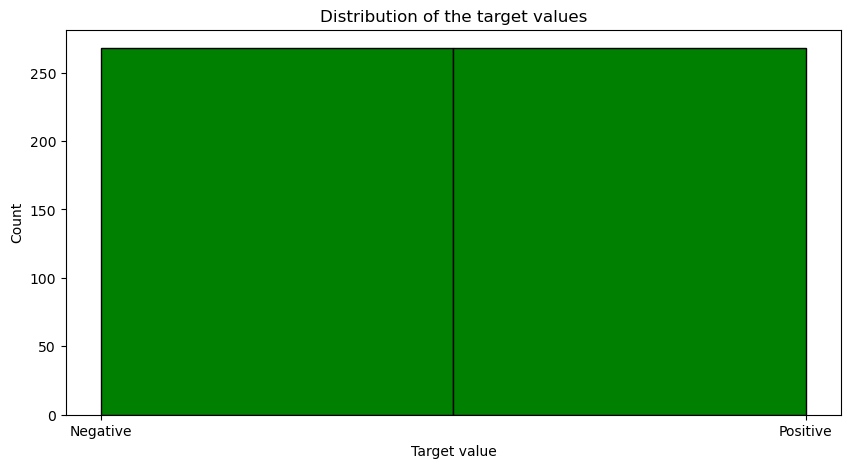

In [6]:
# Sort the dataset for the class column
dataset.sort_values(by=["class"], inplace=True)

# Get the indices of the negative samples
negative_indices = dataset[dataset["class"] == 0].index
# Get the indices of the positive samples
positive_indices = dataset[dataset["class"] == 1].index

# Get the number of negative samples
negative_count = len(negative_indices)
# Get the number of positive samples
positive_count = len(positive_indices)

# Get the number of samples to remove
samples_to_remove = negative_count - positive_count

# Remove the samples
dataset.drop(negative_indices[:samples_to_remove], inplace=True)

# Shuffle the samples evenly for the class
dataset = dataset.sample(frac=1, random_state=1)

# Show the distribution of the target values. Write a description for all Axis and Values
plt.figure(figsize=(10, 5))
# With two colors for each class
plt.hist(dataset["class"], color="green", edgecolor="black", bins=2)
# Show the class names
plt.xticks([0, 1], ["Negative", "Positive"])
plt.title("Distribution of the target values")
plt.xlabel("Target value")
plt.ylabel("Count")
plt.show()


# Retry the Random Forest Classifier with the balanced dataset

In [7]:
# Split the dataset into features and target
features = dataset.iloc[:, 0:8]
target = dataset.iloc[:, 8]

# Split the dataset into training, validation and testing data
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=1)

# Create the classifier with all parameters set explicitly. Set the sampling method to "bootstrap" and the number of trees to 100
classifier = RandomForestClassifier(criterion="entropy", max_depth=3, random_state=1, bootstrap=True, n_estimators=3)

# Train the classifier
classifier.fit(features_train, target_train)

# Predict the target values for the test data
target_predicted = classifier.predict(features_test)

# Show the accuracy score for training and testing data
print(f"Training accuracy: {classifier.score(features_train, target_train)}")
print(f"Testing accuracy: {classifier.score(features_test, target_test)}")

Training accuracy: 0.7663551401869159
Testing accuracy: 0.6851851851851852


# Save the model

In [8]:
import pickle

# Save the model to a file
with open("model.pkl", "wb") as file:
    pickle.dump(classifier, file)

# Load the model from a file
with open("model.pkl", "rb") as file:
    classifier = pickle.load(file)